In [77]:
import numpy as np
import pandas as pd
import csv
import seaborn as sb
import itertools

import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [78]:
df_csv = pd.read_csv("Historical Product Demand.csv")
df_csv

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50


In [79]:
df_csv = df_csv.dropna(axis=0)
df_csv

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50


In [80]:
df_csv.isnull().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

In [81]:
#df_csv['Order_Demand'] = df_csv['Order_Demand'].str.split(',', expand=True)
df_csv['Order_Demand'] = df_csv['Order_Demand'].str.replace('(','', regex=True)
df_csv['Order_Demand'] = df_csv['Order_Demand'].str.replace(')','', regex=True)
df_csv['Order_Demand'] = df_csv['Order_Demand'].replace(' ','', regex=True)
df_csv['Order_Demand'] = df_csv['Order_Demand'].apply(lambda x : int(x))
df_csv

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50


<AxesSubplot:xlabel='Product_Category', ylabel='count'>

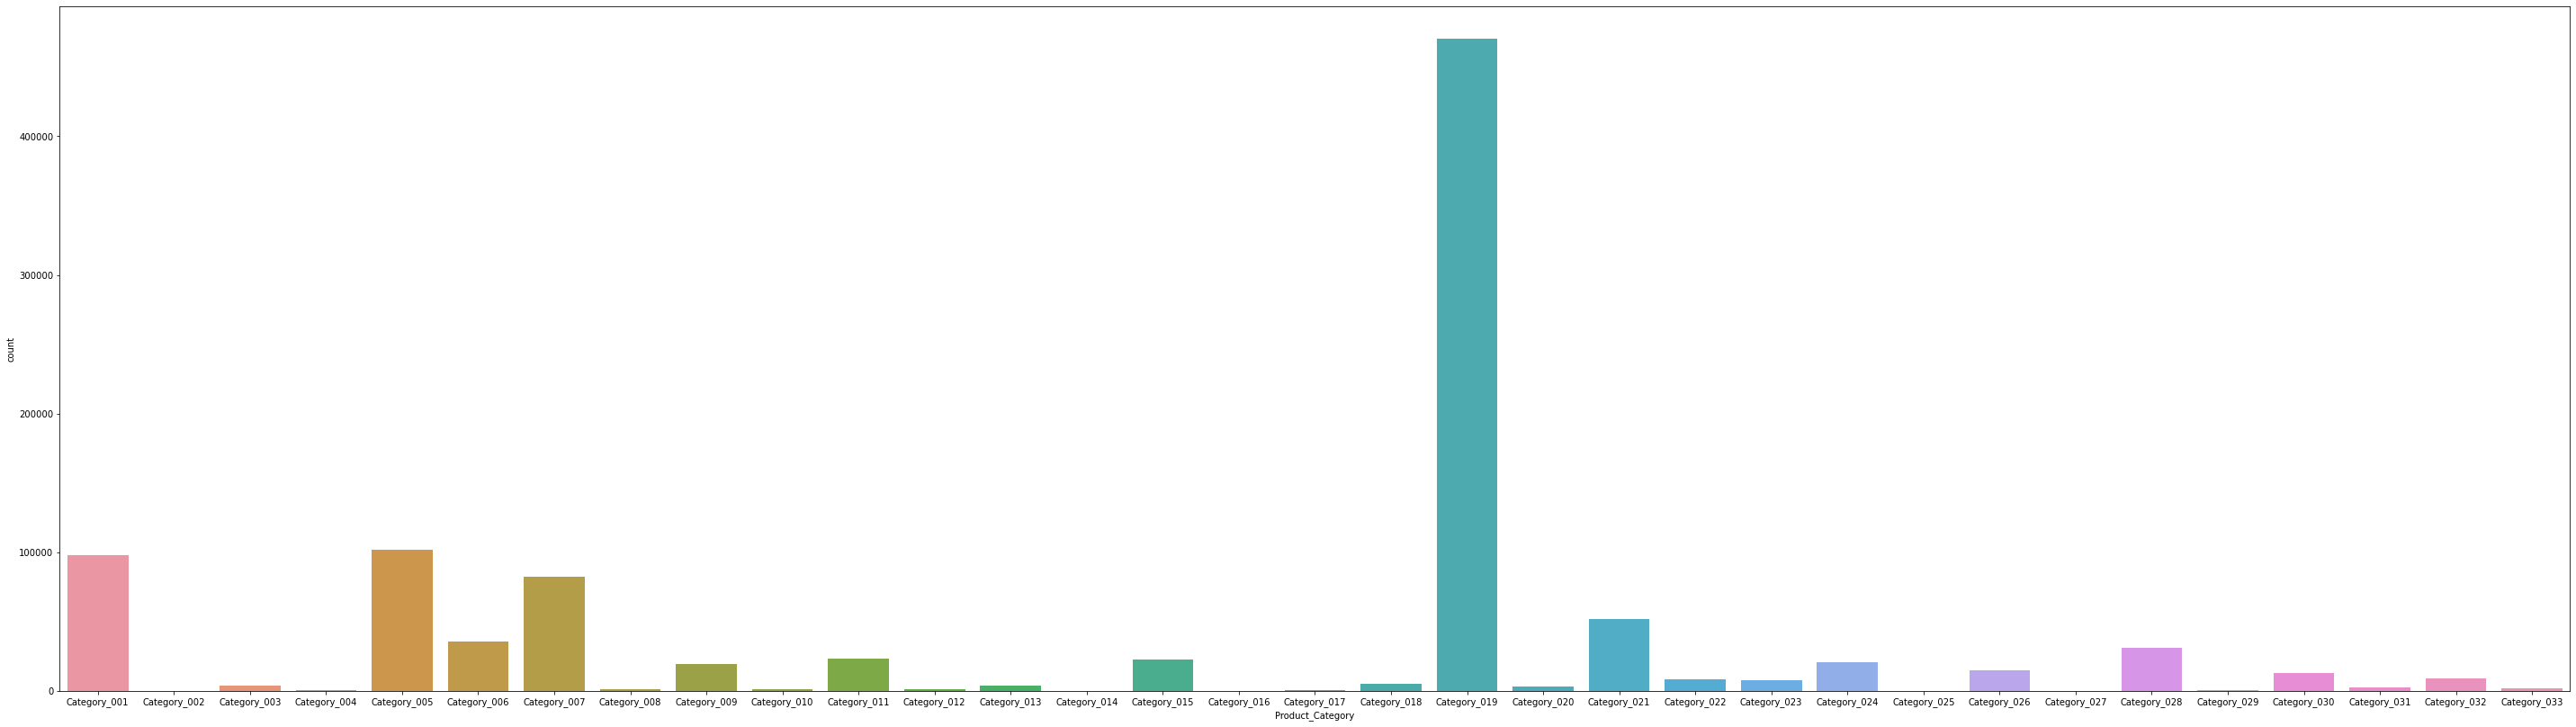

In [82]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 50,14
sb.countplot(df_csv['Product_Category'].sort_values(ascending = True))

In [83]:
df_csv = df_csv[(df_csv['Date']>='2012-01-01') & (df_csv['Date']<='2017-1-9')].sort_values('Date', ascending=True)
df_csv

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
130870,Product_2166,Whse_S,Category_024,2012/1/1,2
116331,Product_1618,Whse_A,Category_024,2012/1/10,2
40442,Product_2006,Whse_J,Category_005,2012/1/10,100
63102,Product_1451,Whse_J,Category_019,2012/1/10,5000
179737,Product_1144,Whse_J,Category_007,2012/1/10,1
...,...,...,...,...,...
964789,Product_0620,Whse_J,Category_001,2016/9/9,2
1034303,Product_1359,Whse_J,Category_019,2016/9/9,1000
875828,Product_0008,Whse_J,Category_005,2016/9/9,500
967074,Product_0409,Whse_J,Category_019,2016/9/9,20


In [84]:
df_csv.groupby('Warehouse')['Order_Demand'].sum().sort_values(ascending=False)
df_csvfinal = pd.DataFrame(df_csv.groupby('Product_Category')['Order_Demand'].sum().sort_values(ascending=False))
df_csvfinal["% Contribution"] = df_csvfinal['Order_Demand']/df_csvfinal['Order_Demand'].sum()*100
df_finalData = df_csvfinal.head()
df_finalData
### Here, we can see that the categories between the decided dates with the highest demand are as follows.

,Order_Demand,% Contribution
Product_Category,,
Category_019,4233421162,82.595039
Category_006,405010821,7.901856
Category_005,198990170,3.882345
Category_007,128660495,2.510196
Category_028,48938528,0.954802


In [85]:
df_csv_cat = df_csv.loc[(df_csv['Product_Category']=='Category_019')]
df_csv_cat.groupby(['Product_Category'])[['Order_Demand']].sum()
df_csv_cat

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
63102,Product_1451,Whse_J,Category_019,2012/1/10,5000
63104,Product_1274,Whse_J,Category_019,2012/1/10,5000
63105,Product_1359,Whse_J,Category_019,2012/1/10,5000
63098,Product_1451,Whse_J,Category_019,2012/1/10,6000
40537,Product_1244,Whse_J,Category_019,2012/1/10,2000
...,...,...,...,...,...
946505,Product_1540,Whse_J,Category_019,2016/9/9,1000
1008069,Product_1213,Whse_J,Category_019,2016/9/9,100
1034303,Product_1359,Whse_J,Category_019,2016/9/9,1000
967074,Product_0409,Whse_J,Category_019,2016/9/9,20


In [86]:
df_csv_cat.Date = pd.to_datetime(df_csv_cat.Date, dayfirst=True)
df1 = df_csv_cat.resample('m', on='Date')['Order_Demand'].mean().dropna()
df1.to_frame()

,Order_Demand
Date,
2012-01-31,8575.141557
2012-02-29,8991.472610
2012-03-31,9003.838926
2012-04-30,8077.697065
2012-05-31,9050.492462
2012-06-30,8726.574559
2012-07-31,9013.581096
2012-08-31,7949.718135
2012-09-30,7381.372568


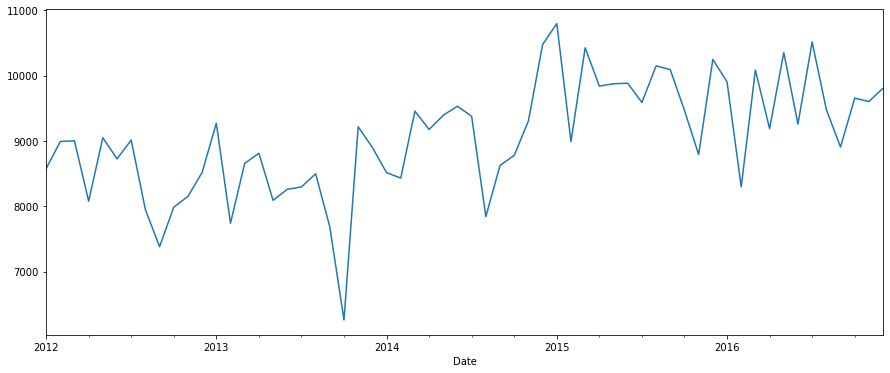

In [87]:
df1.plot(figsize =(15,6))
plt.show()

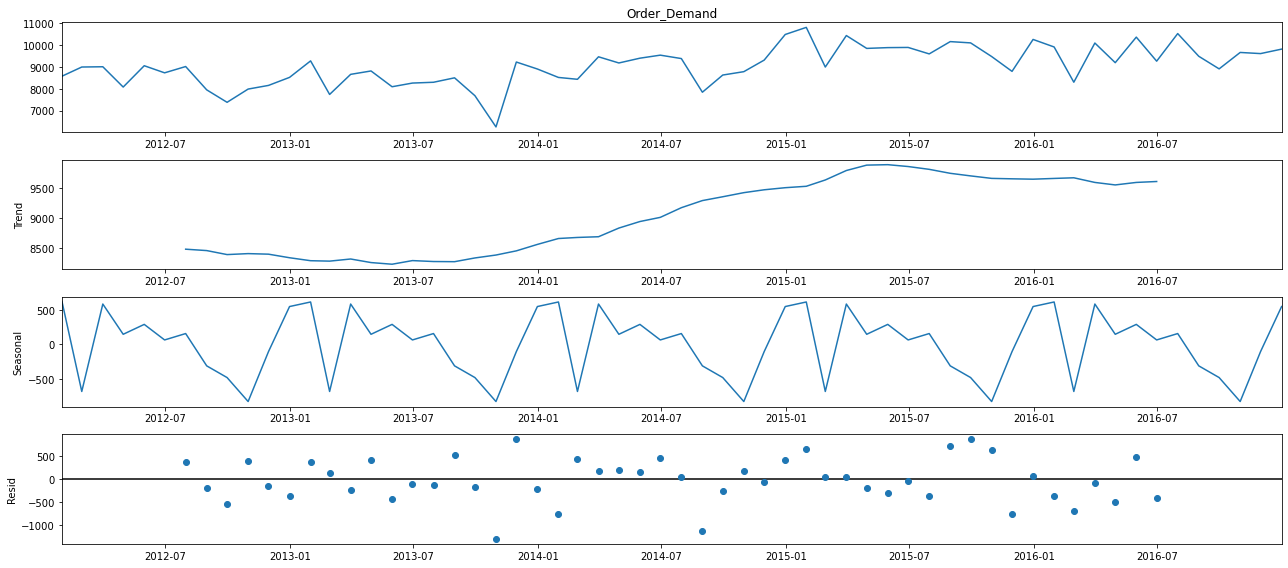

In [88]:
from pylab import rcParams
rcParams['figure.figsize']= 18,8

decomposition = sm.tsa.seasonal_decompose(df1, model= 'additive')
fig = decomposition.plot()
plt.show()

In [89]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [90]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1245.1918295179246
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:968.551367160744
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:784.3479393179932
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1187.546686025313
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:799.7586460703933
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:778.5740938858962
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:602.0808601419408
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1090.3404126251435
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1157.081646364458
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:935.9727201648279
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:764.8108072217301
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1151.792864814913
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:798.483668267641
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:761.291303116238
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:595.3141839064137
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1157.6919279315102
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:956.8424437422838
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:763.4772664754786
ARIMA(0, 1

In [91]:
mod = sm.tsa.statespace.SARIMAX(df1,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0059      0.326     -0.018      0.986      -0.644       0.633
ma.L1         -0.7204      0.187     -3.844      0.000      -1.088      -0.353
ar.S.L12      -0.5739      0.149     -3.850      0.000      -0.866      -0.282
sigma2      4.943e+05   1.41e+05      3.514      0.000    2.19e+05     7.7e+05


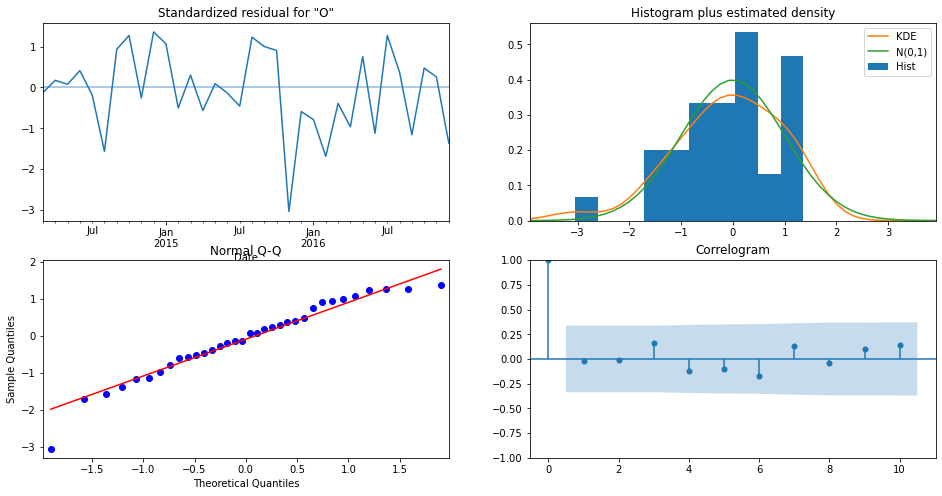

In [92]:
results.plot_diagnostics(figsize = (16,8))
plt.show()

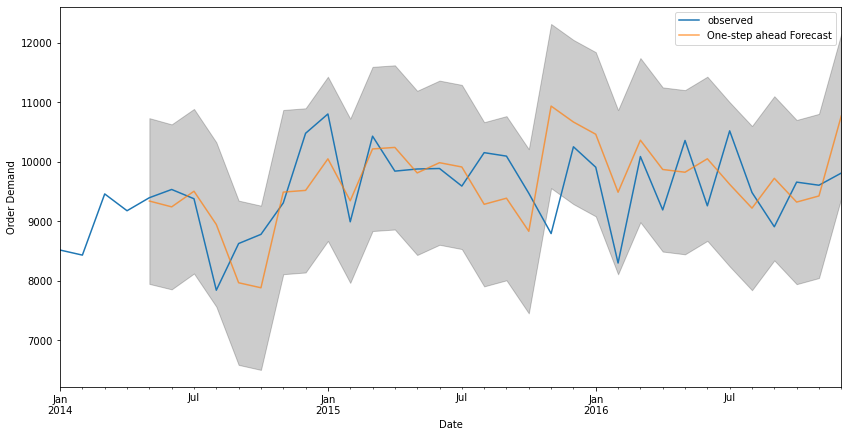

In [93]:
pred = results.get_prediction(start=pd.to_datetime('2014-05-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = df1['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Order Demand')
plt.legend()
plt.show()

In [94]:
df1_forecasted = pred.predicted_mean
df1_truth = df1['2016-01-01':]
mse = ((df1_forecasted - df1_truth) ** 2).mean()
mape = (100-((df1_forecasted - df1_truth)/df1_truth)*100).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
print('The accuracy of the forecast is {}'.format(round(mape, 2)))

The Mean Squared Error of our forecasts is 480094.45
The Root Mean Squared Error of our forecasts is 692.89
The accuracy of the forecast is 97.03


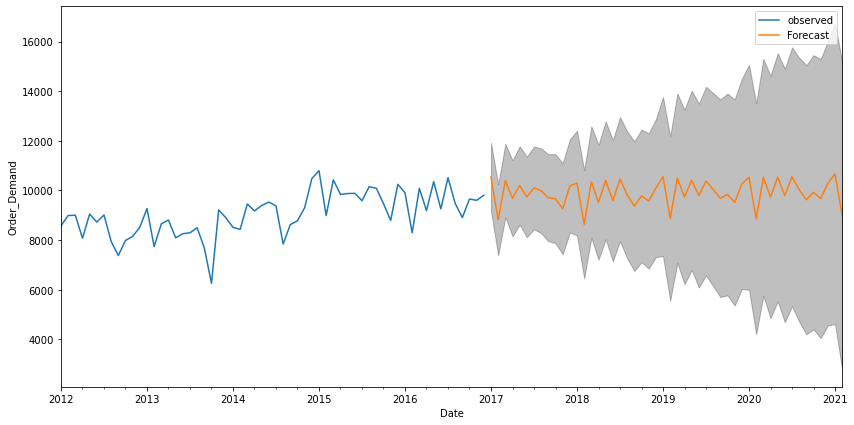

In [95]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = df1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Order_Demand')
plt.legend()
plt.show()
